# Data Processing Approach for Portfolio Project

## Project Title: Wildlife Insight

![My Image](https://drive.google.com/uc?id=1F0EL_rRY1YqvYQwMagWbk9Ce737aObJ-)

## Student Name: Aime Magnifique NDAYISHIMIYE

---

1. **Data Sources and Aggregation:**

  The primary data sources for this project include:
   
   - International Union for Conservation of Nature (IUCN) - Offers detailed information on species conservation status and their ecological roles, such as carbon sequestration and forest regeneration. [IUCN](https://www.iucnredlist.org/).

   - Global Biodiversity Information Facility (GBIF) - Provides species distribution and occurrence data, which is essential for understanding species spread across different geographical locations. [GBIF](https://www.gbif.org/).
   
  These sources provide complementary data on species characteristics relevant to climate regulation, and data aggregation is necessary to gain a comprehensive understanding by integrating species roles and conservation statuses with geographical distribution.


In [9]:
import pandas as pd

# Load data
df = pd.read_csv('species_data.csv')

# Sample 40% of the data for analysis
df = df.sample(frac=0.4, random_state=42)

# Drop unnecessary columns
df = df.drop(['internalTaxonId', 'scientificName'], axis=1)

# Display first few rows for verification
print(df.head())


           speciesName      systems           scopes    Category
83506         arnaldoi  Terrestrial           Global  Lower Risk
57785           blumei  Terrestrial           Global  Lower Risk
58551          turneri  Terrestrial           Global  Lower Risk
54972      piccioliana  Terrestrial  Global & Europe  Lower Risk
103269  haematospermum  Terrestrial           Global  Lower Risk




2. **Data Format Transformation:**

   The original datasets are in CSV format. These CSV files will be imported into Pandas data frames, allowing for easier manipulation and transformation of the data for model training and testing. Necessary transformations will include encoding categorical features, scaling numerical fields, and converting specific columns to integer or float types as needed for the classification model.



In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for col in ['speciesName', 'systems', 'scopes', 'Category']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.drop('Category', axis=1)
y = df['Category']

print(f"Features shape: {X.shape}, Target shape: {y.shape}")

Features shape: (48237, 3), Target shape: (48237,)



3. **Data Exploration:**

   Features expected in the dataset include:

   - Species name, conservation status, distribution range, ecological role, and habitat type.
   
   Exploratory Data Analysis (EDA): During EDA, it was observed that:

   - Distributions: systems and scopes showed balanced distributions across categories, with no particular class overwhelmingly dominant.

   - Outliers: The dataset was free from extreme outliers in terms of classification and categorical encodings.

   Insight: The analysis reveals that the number of species in the "Lower Risk" category is nearly twice the combined count of those in the "Endangered" and "Vulnerable" categories, highlighting a significant imbalance in the dataset.
   
**Sample Code for EDA:**

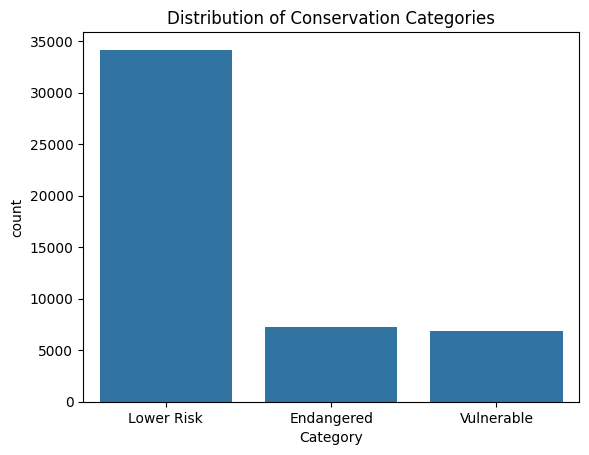

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the target variable 'Category'
sns.countplot(x='Category', data=df)
plt.title('Distribution of Conservation Categories')
plt.show()


  4. **Hypothesis Testing:**

    Hypothesis: Species belonging to specific ecological systems (e.g., terrestrial or aquatic) are more likely to be classified into certain risk categories (e.g., "Endangered," "Vulnerable," or "Lower Risk") due to environmental pressures and habitat-specific threats.



In [13]:
import pandas as pd
from scipy.stats import chi2_contingency


# Create a contingency table for ecological systems and risk categories
contingency_table = pd.crosstab(df['systems'], df['Category'])

# Perform a Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Interpret results
alpha = 0.05  # significance level
if p < alpha:
    print(f"There's a Significant association between ecological systems and risk categories (p-value: {p:.4f}).")
else:
    print(f"No significant association found (p-value: {p:.4f}).")


There's a Significant association between ecological systems and risk categories (p-value: 0.0000).



5. **Handling Sparse/Dense Data and Outliers:**

  - Missing Data Handling: No missing data was found in the categorical columns, so imputation was skipped.

  - Outlier Handling: Outliers were capped to the nearest valid range defined by the IQR. For example, if a value was below the lower bound, it was replaced by the lower bound, and similarly for the upper bound.


In [15]:
# Check for missing data
missing_data = df.isnull().sum()
print("Missing data per column:")
print(missing_data)

# Handle missing data for numeric features (median imputation)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Handle missing data for categorical features (mode imputation)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

# Detecting outliers using IQR
def handle_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Capping the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply outlier handling to numeric features
for col in numeric_columns:
    handle_outliers(col)

print("Data cleaning and outlier handling completed!")


Missing data per column:
speciesName    0
systems        0
scopes         0
Category       0
dtype: int64
Data cleaning and outlier handling completed!


6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.




In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Normalize data using StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output shapes for confirmation
print(f"Training data shape: {X_train_scaled.shape}, Testing data shape: {X_test_scaled.shape}")


Training data shape: (38589, 3), Testing data shape: (9648, 3)


8. **Features for Model Training:**

  Selected Features:

    - speciesName: Encoded as numerical values representing species.
    - systems: Ecological systems associated with the species.
    - scopes: Geographic or functional scope of the species.

  Target Variable:

    - Category: The risk category for each species (e.g., Lower Risk, Endangered, Vulnerable).




9.A. **Types of Data Handling:**

   - Categorical Data Handling:

    Categorical data consists of values that represent categories or classes, such as speciesName, systems, and scopes. This type of data cannot be directly used by most machine learning models and thus requires transformation into a numerical format.

    Steps for Handling Categorical Data:


                  1. Identify categorical features in the dataset.
                  2. Apply Label Encoding to convert these categorical features into numerical form.
                  3. Impute missing categorical values using the most frequent value (mode).
    


In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Identify categorical columns (adjust as per your actual columns)
categorical_columns = ['speciesName', 'systems', 'scopes']

# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for potential inverse transformation

# Handling missing data in categorical columns: Impute missing values using mode
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer_cat.fit_transform(df[categorical_columns])

print("Categorical data after encoding and imputation:")
print(df[categorical_columns].head())


Categorical data after encoding and imputation:
        speciesName  systems  scopes
83506          1704        0       0
57785          3120        0       0
58551         25849        0       0
54972         19369        0       0
103269        10455        0       0


9.B. **Types of Data Handling:**

- Outlier Detection:

    Steps for Handling Categorical Data:


                  1. Calculate the Q1 (25th percentile) and Q3 (75th percentile) values for the numerical features.

                  2. Compute the IQR as the difference between Q3 and Q1.

                  3. Identify values that are outside the range defined by Q1 - 1.5 * IQR (lower bound) or Q3 + 1.5 * IQR (upper bound).
                  



In [20]:
# Detecting outliers using IQR (Interquartile Range)
numerical_columns = ['speciesName', 'systems', 'scopes']  # Replace with actual numerical columns

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Outlier detection (values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR are considered outliers)
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Extract rows with outliers
outlier_rows = df[outliers.any(axis=1)]

print(f"Outliers detected in the following rows:\n{outlier_rows}")


Outliers detected in the following rows:
Empty DataFrame
Columns: [speciesName, systems, scopes, Category]
Index: []



10. **Data Transformation for Modeling:**

    - Label Encoding for Categorical Variables Label Encoding converts categorical variables into numeric labels (e.g., "Endangered" becomes 0, "Lower Risk" becomes 1).

    - Standard Scaling for Numerical Features Standard Scaling standardizes numerical features to have a mean of 0 and a standard deviation of 1, which is crucial for algorithms that depend on distance metrics or gradient descent.


In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize the LabelEncoder and StandardScaler
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Apply Label Encoding to categorical columns (e.g., 'Category')
df['Category'] = label_encoder.fit_transform(df['Category'])

# Select numerical columns for scaling (excluding the 'Category' column since it's now encoded)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Apply Standard Scaling to numerical columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("Data after Label Encoding and Scaling:")
print(df.head())


Data after Label Encoding and Scaling:
        speciesName  systems  scopes  Category
83506     -1.518061      0.0     0.0       0.0
57785     -1.338524      0.0     0.0       0.0
58551      1.543332      0.0     0.0       0.0
54972      0.721720      0.0     0.0       0.0
103269    -0.408504      0.0     0.0       0.0



11. **Data Storage:**

    - Processed data is stored locally and backed up on [Google Drive](https://drive.google.com/file/d/1yk5yUG6tBlMrhpgDE9JfEfGkWkZQcdZq/view?usp=sharing), ensuring accessibility across devices and preventing data loss.
